In [1]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
import os
import astropy.io.fits as fits
from astropy.table import Table
from desitarget import desi_mask, bgs_mask, mws_mask, contam_mask
from desiutil.plots import prepare_data, init_sky, plot_sky_circles, plot_sky_binned
from desiutil.log import get_logger
import warnings
import mpl_toolkits
%matplotlib inline

In [2]:
import healpy

In [3]:
program = 'dark'
topdir = os.path.join("/hpcfs/home/ciencias/fisica/docentes/je.forero/desidata/test_20170508/")
truthfile = os.path.join(topdir, 'input/{}/'.format(program), 'truth.fits')
targetfile = os.path.join(topdir, 'input/{}/'.format(program), 'targets.fits')
zcatfile = os.path.join(topdir, 'output/{}/4'.format(program), 'zcat.fits')

#skyfile = os.path.join(topdir, 'sky.fits')
#stddarkfile = os.path.join(topdir, 'standards-dark.fits')
#stdbrightfile = os.path.join(topdir, 'standards-bright.fits')

In [4]:
targets  = fits.getdata(targetfile)

In [5]:
Table(targets[:10])

TARGETID,RA,DEC,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,BRICKNAME,DECAM_FLUX [6],SHAPEDEV_R,SHAPEEXP_R,DEPTH_R,GALDEPTH_R
int64,float64,float64,int64,int64,int64,float64,float64,str8,float32,float32,float32,float32,float32
1913083273142325984,9.59603287191,-7.96864299891,4,0,0,0.874412621321,1.0,0098m080,0.0 .. 0.0,0.0,0.0,24.7716,24.4795
2771587901724092043,2.46544022805,-14.7033657602,4,0,0,0.339985051046,1.0,0023m145,0.0 .. 0.0,0.0,0.0,23.9023,23.6205
969669320400918333,5.65710217668,-8.69037459083,4,0,0,0.19649634412,1.0,0057m085,0.0 .. 0.0,0.0,0.0,21.9372,21.7386
3524774154980433357,9.52008938818,-8.14619205472,4,0,0,0.689182304402,1.0,0093m080,0.0 .. 0.0,0.0,0.0,24.8698,24.5472
3815924188513168547,9.87313688016,-5.47601742467,4,0,0,0.412090351859,1.0,0097m055,0.0 .. 0.0,0.0,0.0,24.6583,24.3936
2574966351288023565,3.72897315425,-13.201883338,4,0,0,0.0331880302021,1.0,0038m130,0.0 .. 0.0,0.0,0.0,24.9373,24.6974
3910964841860800689,5.42150220456,-10.2811286749,4,0,0,0.0367054553279,1.0,0053m105,0.0 .. 0.0,0.0,0.0,24.7737,24.4967
2839749178270131820,6.71776150313,-10.8874062533,4,0,0,0.8465572925,1.0,0068m110,0.0 .. 0.0,0.0,0.0,23.7261,23.4912
494347467813955667,2.29951992127,-11.226112242,4,0,0,0.524939003802,1.0,0022m110,0.0 .. 0.0,0.0,0.0,24.2043,23.9255


In [73]:
def qadensity(cat, objtype, targdens=None, max_bin_area=15.0):
    label = '{} (targets/deg$^2$)'.format(objtype)
    if targdens:
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    else:
        fig, ax = plt.subplots(1)
    ax = np.atleast_1d(ax)
    
    basemap = init_sky(galactic_plane_color='k', ax=ax[0]);
    basemap, data = plot_sky_binned(cat['RA'], cat['DEC'], max_bin_area=max_bin_area,
                                    clip_lo='!1', cmap='jet', plot_type='healpix', 
                                    label=label, basemap=basemap)
    if targdens:
        dens = data[np.nonzero(data)]
        ax[1].hist(dens, bins=40, histtype='stepfilled', alpha=0.6, label='Observed {} Density'.format(objtype))
        if objtype in targdens.keys():
            ax[1].axvline(x=targdens[objtype], ls='--', color='k', label='Goal {} Density'.format(objtype))
        ax[1].set_xlabel(label)
        ax[1].set_ylabel('Number of Healpixels')
        ax[1].legend(loc='upper left', frameon=False)
        fig.subplots_adjust(wspace=0.2)
    return dens

In [74]:
# Desired target densities, including contaminants.
targdens = {'ELG': 2400, 'LRG': 350, 'QSO': 260, 'SKY': 1400}

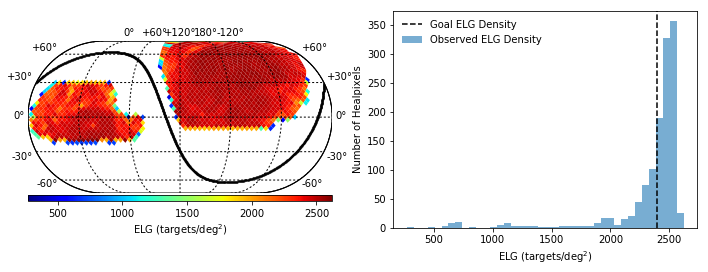

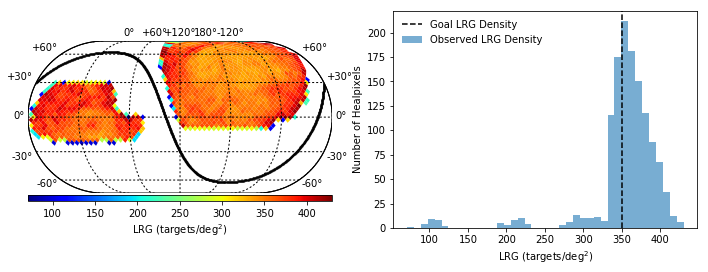

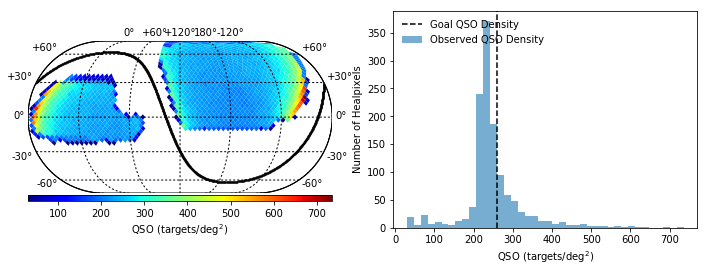

In [75]:
for obj in ['ELG','LRG','QSO']:
    these = (targets['DESI_TARGET'] & desi_mask.mask(obj)) != 0
    dd = targets[these]
    a = qadensity(dd, obj, targdens=targdens)